<a href="https://colab.research.google.com/github/fahmisyuhada/klasifikasi_sel_malaria_CNN/blob/main/klasifikasi_sel_malaria_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [12]:
!kaggle datasets download -d 'iarunava/cell-images-for-detecting-malaria'
import zipfile

data_set = zipfile.ZipFile('cell-images-for-detecting-malaria.zip', 'r')

data_set.extractall()
data_set.close()
print('dataset unzip successfully')

cell-images-for-detecting-malaria.zip: Skipping, found more recently modified local copy (use --force to force download)
dataset unzip successfully


In [14]:
import numpy as np
np.random.seed

import cv2
import os
from PIL import Image
import keras

os.environ['KERAS_BACKEND'] = 'tensorflow'

image_directory = 'cell_images/'
SIZE = 64
dataset = []
label = []

parasitezed_images = os.listdir(image_directory + 'Parasitized/')
for i, image_name in enumerate(parasitezed_images):
  if(image_name.split('.')[1] == 'png'):
    image = cv2.imread(image_directory + 'Parasitized/' + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((SIZE, SIZE))
    dataset.append(np.array(image))
    label.append(0)

uninfected_images = os.listdir(image_directory + 'Uninfected/')
for i, image_name in enumerate(uninfected_images):
  if(image_name.split('.')[1] == 'png'):
    image = cv2.imread(image_directory + 'Uninfected/' + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((SIZE, SIZE))
    dataset.append(np.array(image))
    label.append(1)

print("Load Data Succesfully")

Load Data Succesfully


In [15]:
#### There are two type to make model tha we can chose ####

#### First : Using Class Model ####
#####################################
INPUT_SHAPE = (SIZE, SIZE, 3)   # change to (SIZE, SIZE, 3)


###### Make Layer CNN #######
inp = keras.layers.Input(shape=INPUT_SHAPE)

conv1 = keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(inp)
pool1 = keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)
norm1 = keras.layers.BatchNormalization(axis=-1)(pool1)
drop1 = keras.layers.Dropout(rate=0.2)(norm1)

conv2 = keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(drop1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2,2))(conv2)
norm2 = keras.layers.BatchNormalization(axis=-1)(pool2)
drop2 = keras.layers.Dropout(rate=0.2)(norm2)

flat = keras.layers.Flatten()(drop2) # Flatten the matrix to get it ready for

hidden1 = keras.layers.Dense(512, activation='relu')(flat)
norm3 = keras.layers.BatchNormalization(axis=-1)(hidden1)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)
hidden2 = keras.layers.Dense(256, activation='relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis=-1)(hidden2)
drop4 = keras.layers.Dropout(rate=0.2)(norm4)

out = keras.layers.Dense(2, activation='sigmoid')(drop4)

model = keras.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248

In [38]:
###########################################
### Second : Using Sequential model #######
#Sequential
#You can create a Sequential model by passing a list of layer instances to the constructor:

from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

model = None
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu', data_format='channels_last'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Convolution2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(activation = 'relu', units=512))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(activation = 'relu', units=256))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(activation = 'sigmoid', units=2))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 31, 31, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0

In [39]:
### Split the dataset
#
# I split the dataset into training and testing dataset.
# 1. Training data: 80%
# 2. Testing data: 20%
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)

# When training with Keras's Model.fit(), adding the tf.keras.callback.TensorBoard callback
# ensures that logs are created and stored. Additionally, enable histogram computation
#every epoch with histogram_freq=1 (this is off by default)
#Place the logs in a timestamped subdirectory to allow easy selection of different training runs.


In [40]:
#import datetime

#log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d_%H%M%S") + "/"
#tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


# ### Training the model
# As the training data is now ready, I will use it to train the model.

#Fit the model
history = model.fit(np.array(X_train),
                         y_train,
                         batch_size = 64,
                         verbose = 1,
                         epochs = 25,      #Changed to 3 from 50 for testing purposes.
                         validation_split = 0.1,
                         shuffle = False
                      #   callbacks=callbacks
                     )

# ## Accuracy calculation
#
# I'll now calculate the accuracy on the test data.

print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))

Epoch 1/25
311/311 [==============================] - 209s 449ms/step - loss: 0.4459 - accuracy: 0.8088 - val_loss: 0.3246 - val_accuracy: 0.9029
Epoch 2/25
 80/311 [======>.......................] - ETA: 1:41 - loss: 0.2436 - accuracy: 0.9080

KeyboardInterrupt: ignored

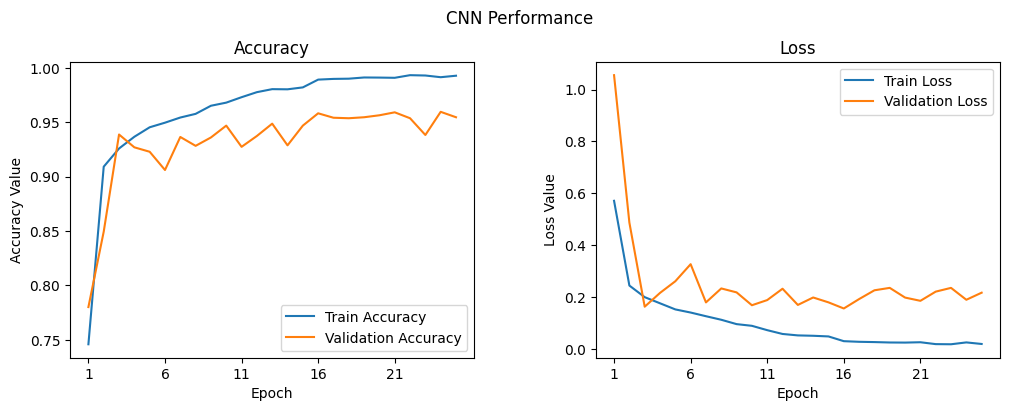

In [19]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [20]:
#Save the model
model.save('malaria_cnn.h5')

In [24]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))

173/173 [==============================] - 10s 54ms/step - loss: 0.2743 - accuracy: 0.9501
Test_Accuracy: 95.01%


In [37]:
y_predict = model.predict_classes(np.array(X_test))

AttributeError: ignored

In [36]:
y_predict[0]

array([9.9999964e-01, 2.4644322e-07], dtype=float32)